# Gradient boosting
## Mateusz Baran
### 155620

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

## Diabetes

In [166]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [167]:
# drop null values
data.dropna(inplace=True)

In [168]:
# prepare X and Y
X = pd.get_dummies(data)
X.drop(['Outcome'], inplace=True, axis=1)
y = data['Outcome']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [170]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)


In [171]:
hiperparameters_dict = [
    {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.8},
    {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.8},
    {'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.1},
    {'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01},
    {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.8},
    {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.8},
    {'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.8},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01},
    {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01},
    {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.01},
]
models_store = []

In [172]:
for i, hiperparameters in enumerate(hiperparameters_dict):
    model = XGBClassifier(
        n_estimators=hiperparameters['n_estimators'],
        max_depth=hiperparameters['max_depth'],
        learning_rate=hiperparameters['learning_rate'],
    )
    model.fit(X_train, y_train)
    print(f"Model id: {i} with hiperparameters:\n\n n_estimators={hiperparameters['n_estimators']}, max_depth={hiperparameters['max_depth']}, learning_rate={hiperparameters['learning_rate']}")
    # make prediction for test data
    y_pred = model.predict(X_test)
    # evaluate prediction
    model_score_test = accuracy_score(y_test, y_pred)
    print('\nTest Accuracy of XBG Classifier: {0:0.2f}'.format(model_score_test * 100.0))
    # plot the predictions for train data
    print('\ntest confusion_matrix')
    print(confusion_matrix(y_pred, y_test))
    
    y_pred = model.predict(X_train)
    # evaluate prediction
    model_score_train = accuracy_score(y_train, y_pred)
    print('\nTrain Accuracy of XBG Classifier: {0:0.2f}'.format(model_score_train * 100.0))
    # plot the predictions for train data
    print('\ntrain confusion_matrix')
    print(confusion_matrix(y_pred, y_train))
    print('=====' *20)
    
    models_store.append(
        {'model': model, 'accuracy_test': model_score_test * 100.0, 'accuracy_train': model_score_train * 100.0}
    )
    
    

Model id: 0 with hiperparameters:

 n_estimators=1000, max_depth=5, learning_rate=0.8

Test Accuracy of XBG Classifier: 71.86

test confusion_matrix
[[121  38]
 [ 27  45]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[352   0]
 [  0 185]]
Model id: 1 with hiperparameters:

 n_estimators=1000, max_depth=10, learning_rate=0.8

Test Accuracy of XBG Classifier: 73.16

test confusion_matrix
[[120  34]
 [ 28  49]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[352   0]
 [  0 185]]
Model id: 2 with hiperparameters:

 n_estimators=1000, max_depth=20, learning_rate=0.1

Test Accuracy of XBG Classifier: 71.86

test confusion_matrix
[[120  37]
 [ 28  46]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[352   0]
 [  0 185]]
Model id: 3 with hiperparameters:

 n_estimators=1000, max_depth=20, learning_rate=0.01

Test Accuracy of XBG Classifier: 73.59

test confusion_matrix
[[123  36]
 [ 25  47]]

Train Accuracy of XBG Classifier: 100.00

Najlepszy model ma takie hiperparametry:  n_estimators=100, max_depth=20, learning_rate=0.01

<Figure size 1000x1000 with 0 Axes>

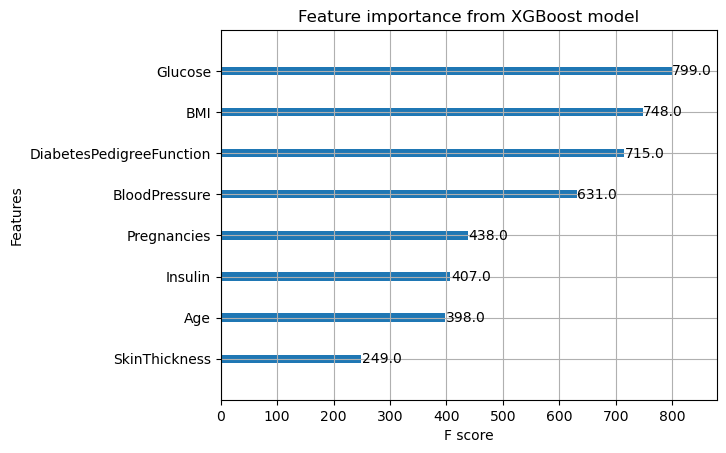

In [173]:
model = models_store[9]['model']
plt.figure(figsize=(10,10))
plot_importance(model, title='Feature importance from XGBoost model')
plt.show()

## Phytobasin

In [174]:
data = pd.read_csv('data/vlaPhytoBasin.csv')
data.head()

,Cyanobacteria,Chlorophyceae,Euglenophyceae,Diatomophyceae,Flagellata,Dinoflagellata,Cryptophytes,picophytoplankton,Basin
0,2.35,3.08,0.92,0.23,0.00,0.0,0.00,3.20,0
1,6.39,2.87,0.49,0.01,0.00,0.0,0.00,2.42,0
2,2.05,7.47,0.00,0.06,0.17,0.0,0.00,2.61,0
3,6.30,5.03,0.00,0.11,0.10,0.0,0.00,2.49,0
4,3.77,5.69,0.00,0.01,0.04,0.0,0.02,1.73,0


In [175]:
# drop null values
data.dropna(inplace=True)

In [176]:
# prepare X and Y
X = pd.get_dummies(data)
X.drop(['Basin'], inplace=True, axis=1)
y = data['Basin']

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [178]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (108, 8)
Shape of X_test: (47, 8)


In [179]:
hiperparameters_dict = [
    {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.8},
    {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.8},
    {'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.1},
    {'n_estimators': 1000, 'max_depth': 20, 'learning_rate': 0.01},
    {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.8},
    {'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.8},
    {'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.8},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01},
    {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01},
    {'n_estimators': 100, 'max_depth': 20, 'learning_rate': 0.01},
]
models_store = []

In [180]:
for i, hiperparameters in enumerate(hiperparameters_dict):
    model = XGBClassifier(
        n_estimators=hiperparameters['n_estimators'],
        max_depth=hiperparameters['max_depth'],
        learning_rate=hiperparameters['learning_rate'],
    )
    model.fit(X_train, y_train)
    print(f"Model id: {i} with hiperparameters:\n\n n_estimators={hiperparameters['n_estimators']}, max_depth={hiperparameters['max_depth']}, learning_rate={hiperparameters['learning_rate']}")
    # make prediction for test data
    y_pred = model.predict(X_test)
    # evaluate prediction
    model_score_test = accuracy_score(y_test, y_pred)
    print('\nTest Accuracy of XBG Classifier: {0:0.2f}'.format(model_score_test * 100.0))
    # plot the predictions for train data
    print('\ntest confusion_matrix')
    print(confusion_matrix(y_pred, y_test))
    
    y_pred = model.predict(X_train)
    # evaluate prediction
    model_score_train = accuracy_score(y_train, y_pred)
    print('\nTrain Accuracy of XBG Classifier: {0:0.2f}'.format(model_score_train * 100.0))
    # plot the predictions for train data
    print('\ntrain confusion_matrix')
    print(confusion_matrix(y_pred, y_train))
    print('=====' *20)
    
    models_store.append(
        {'model': model, 'accuracy_test': model_score_test * 100.0, 'accuracy_train': model_score_train * 100.0}
    )
    
    

Model id: 0 with hiperparameters:

 n_estimators=1000, max_depth=5, learning_rate=0.8

Test Accuracy of XBG Classifier: 63.83

test confusion_matrix
[[20  9]
 [ 8 10]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[62  0]
 [ 0 46]]
Model id: 1 with hiperparameters:

 n_estimators=1000, max_depth=10, learning_rate=0.8

Test Accuracy of XBG Classifier: 63.83

test confusion_matrix
[[21 10]
 [ 7  9]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[62  0]
 [ 0 46]]
Model id: 2 with hiperparameters:

 n_estimators=1000, max_depth=20, learning_rate=0.1

Test Accuracy of XBG Classifier: 63.83

test confusion_matrix
[[20  9]
 [ 8 10]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[62  0]
 [ 0 46]]
Model id: 3 with hiperparameters:

 n_estimators=1000, max_depth=20, learning_rate=0.01

Test Accuracy of XBG Classifier: 59.57

test confusion_matrix
[[18  9]
 [10 10]]

Train Accuracy of XBG Classifier: 100.00

train confusion_matrix
[[6

Najlepszy model ma takie hiperparametry:  n_estimators=100, max_depth=20, learning_rate=0.01

<Figure size 1000x1000 with 0 Axes>

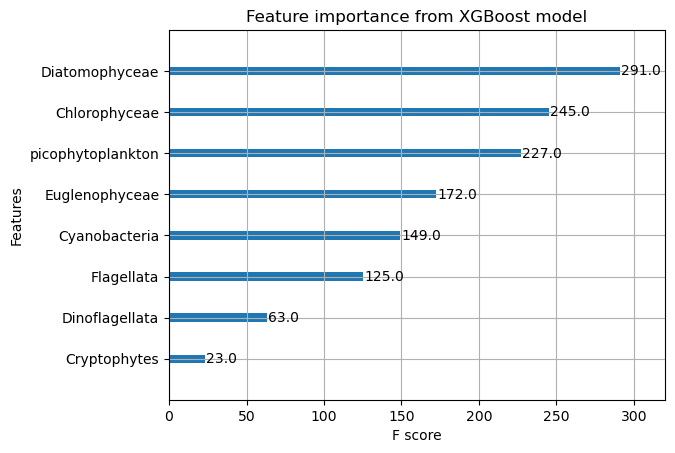

In [181]:
model = models_store[9]['model']
plt.figure(figsize=(10,10))
plot_importance(model, title='Feature importance from XGBoost model')
plt.show()

## Wnioski:
Największy wpływ na trenowanie tego modelu ma learning rate